In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Fungsi bantu untuk menampilkan gambar di notebook
def show_image(img, title="", cmap=None):
    plt.figure(figsize=(4, 4))
    # Jika grayscale (2D array), pakai cmap='gray'
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        # Jika gambar 3 channel BGR, convert ke RGB agar warna sesuai saat ditampilkan
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
base_dir = "../..//datasets/final-data"  # ganti sesuai path Anda

all_images = {}  # menyimpan gambar mentah dari masing-masing folder

In [10]:
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        # Buat list untuk menyimpan gambar dari folder ini
        images_in_folder = []
        
        for file_name in os.listdir(folder_path):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(folder_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    images_in_folder.append(img)
        
        # Masukkan ke dictionary jika ada gambar
        if images_in_folder:
            all_images[folder_name] = images_in_folder

# Cek jumlah folder yang berhasil terbaca
print("Jenis Batik Terbaca:", list(all_images.keys()))

Jenis Batik Terbaca: ['batik-cendrawasih', 'batik-bali', 'batik-betawi', 'batik-sidoluhur', 'batik-kawung', 'batik-garutan', 'batik-priangan', 'batik-parang', 'batik-ciamis', 'batik-tambal', 'batik-sogan', 'batik-pekalongan', 'batik-gentongan', 'batik-sidomukti', 'batik-keraton', 'batik-lasem', 'batik-sekar', 'batik-megamendung', 'batik-ceplok', 'batik-celup']


Folder: batik-cendrawasih


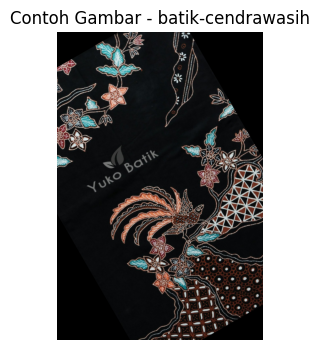

In [11]:
some_folder = list(all_images.keys())[0]  # contoh folder pertama
print("Folder:", some_folder)
if all_images[some_folder]:
    sample_img = all_images[some_folder][0]
    show_image(sample_img, title=f"Contoh Gambar - {some_folder}")

# Pra-pemrosesan

## Normalisasi Ukuran Gambar

In [14]:
# Fungsi letterbox untuk meresize gambar dengan mempertahankan rasio aspeknya
def letterbox_image(img, target_size=(224, 224), fill_color=(0, 0, 0)):
    h, w = img.shape[:2]
    target_w, target_h = target_size

    # Hitung faktor skala agar gambar muat di dalam target tanpa mengubah rasio aspeknya
    scale = min(target_w / w, target_h / h)
    new_w = int(w * scale)
    new_h = int(h * scale)

    # Resize gambar sesuai dengan skala yang dihitung
    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Buat kanvas target dengan ukuran (224,224) dan isi dengan fill_color
    if len(img.shape) == 3:  # Gambar berwarna (BGR)
        canvas = np.full((target_h, target_w, 3), fill_color, dtype=resized.dtype)
    else:  # Gambar grayscale
        canvas = np.full((target_h, target_w), fill_color[0], dtype=resized.dtype)

    # Hitung offset agar gambar ditempatkan di tengah
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2

    # Tempelkan gambar ke kanvas
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
    return canvas

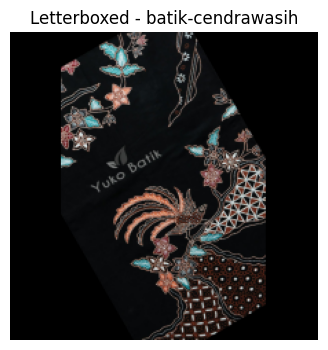

Ukuran gambar letterboxed: (224, 224, 3)


In [15]:
# Langkah 1: Terapkan letterboxing untuk meresize gambar ke 224x224 tanpa distorsi
target_size = (224, 224)
resized_images = {}

for folder_name, img_list in all_images.items():
    resized_list = []
    for img in img_list:
        img_letterboxed = letterbox_image(img, target_size=target_size, fill_color=(0, 0, 0))
        resized_list.append(img_letterboxed)
    resized_images[folder_name] = resized_list

# Tampilkan contoh hasil letterbox
some_folder = list(resized_images.keys())[0]
sample_img = resized_images[some_folder][0]
show_image(sample_img, title=f"Letterboxed - {some_folder}")
print("Ukuran gambar letterboxed:", sample_img.shape)

## Konversi ke Grayscale

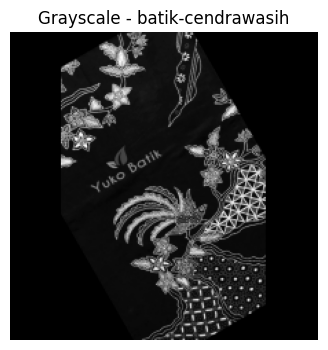

Ukuran gambar grayscale: (224, 224)


In [16]:
# Langkah 3: Konversi ke Grayscale (setelah resize/letterboxing)
grayscale_images = {}

for folder_name, img_list in resized_images.items():
    gray_list = []
    for img in img_list:
        # Konversi gambar (yang berukuran 224x224 dengan padding) ke grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_list.append(img_gray)
    grayscale_images[folder_name] = gray_list

# Tampilkan contoh hasil grayscale
some_folder = list(grayscale_images.keys())[0]
sample_gray = grayscale_images[some_folder][0]
show_image(sample_gray, title=f"Grayscale - {some_folder}", cmap='gray')
print("Ukuran gambar grayscale:", sample_gray.shape)

## Normalisasi Piksel

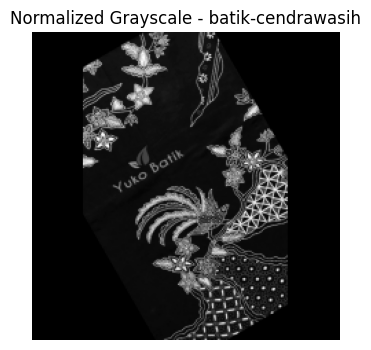

Nilai piksel: min = 0.0 max = 0.88235295
Ukuran gambar normalized grayscale: (224, 224)


In [17]:
# Langkah 4: Normalisasi Piksel (mengubah ke float32 dan skala ke rentang [0, 1])
normalized_gray_images = {}

for folder_name, img_list in grayscale_images.items():
    norm_list = []
    for img in img_list:
        # Ubah tipe data ke float32 dan normalisasi ke rentang [0, 1]
        img_norm = img.astype(np.float32) / 255.0
        norm_list.append(img_norm)
    normalized_gray_images[folder_name] = norm_list

# Tampilkan contoh hasil normalisasi grayscale
sample_norm_gray = normalized_gray_images[some_folder][0]
show_image(sample_norm_gray, title=f"Normalized Grayscale - {some_folder}", cmap='gray')
print("Nilai piksel: min =", sample_norm_gray.min(), "max =", sample_norm_gray.max())
print("Ukuran gambar normalized grayscale:", sample_norm_gray.shape)

# Feature Extraction

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Lambda
from tensorflow.keras.models import Model
import numpy as np

2025-02-20 14:40:48.527887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Fungsi untuk mengkonversi gambar grayscale (224,224) ke 3 channel (224,224,3)
def to_three_channels(img):
    if len(img.shape) == 2:  # jika bentuk (224,224)
        return np.stack((img,)*3, axis=-1)
    elif img.shape[2] == 1:
        return np.concatenate([img, img, img], axis=-1)
    else:
        return img

In [20]:
# Definisikan model ekstraksi fitur:
# Gunakan ResNet50 tanpa bagian top (fully connected), kemudian global average pooling dan dense layer 256 unit.
input_tensor = Input(shape=(224, 224, 3))
# Gunakan pre-trained ResNet50 dengan include_top=False
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
feature_extractor = Model(inputs=input_tensor, outputs=x)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [21]:
print(feature_extractor.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,256 (91.98 MB)

 Trainable params: 24,059,136 (91.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [22]:
extracted_features = {}

# Iterasi setiap folder
for folder_name, img_list in normalized_gray_images.items():
    folder_features = []
    for img in img_list:
        # Jika gambar grayscale (shape (224,224)), ubah ke 3 channel (224,224,3)
        if len(img.shape) == 2 or (len(img.shape)==3 and img.shape[2]==1):
            img_3ch = to_three_channels(img)
        else:
            img_3ch = img
        # Pastikan tipe data float32 dan rentang nilai [0, 1]
        img_3ch = img_3ch.astype(np.float32)
        # Jika perlu, Anda bisa mengubah rentang menggunakan preprocess_input:
        # img_input = tf.keras.applications.resnet50.preprocess_input(img_3ch * 255.0)
        # Namun di sini, misalkan kita gunakan langsung nilai [0,1].
        # Model pre-trained ImageNet umumnya membutuhkan rentang dan preprocessing khusus,
        # sehingga Anda bisa menyesuaikan sesuai kebutuhan.
        
        # Ubah dimensi (224,224,3) menjadi (1,224,224,3) untuk prediksi
        img_input = np.expand_dims(img_3ch, axis=0)
        # Ekstraksi fitur
        features = feature_extractor.predict(img_input)
        # Hasilnya: array shape (1, 256). Ambil vektor fitur
        folder_features.append(features[0])
    extracted_features[folder_name] = folder_features


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━

In [23]:
# Tampilkan contoh vektor fitur untuk satu gambar dari salah satu folder
some_folder = list(extracted_features.keys())[0]
sample_feature = extracted_features[some_folder][0]
print(f"Contoh vektor fitur dari folder {some_folder}:", sample_feature)
print("Dimensi vektor fitur:", sample_feature.shape)

Contoh vektor fitur dari folder batik-cendrawasih: [0.         0.         0.23533747 0.         0.         1.8853434
 0.24185255 0.         1.0539465  0.         0.         1.4261798
 0.         0.         0.45037857 0.29329854 0.         0.
 0.         0.         1.0425185  0.93014014 0.07080055 0.
 0.         0.3248397  0.5961652  1.0808506  0.         0.27930343
 0.         0.         0.         0.         0.         0.43007472
 0.1891073  1.3111516  0.         0.         0.         0.40531594
 1.322278   0.77985066 0.7365182  0.         0.48295814 0.50296515
 0.14943026 0.849518   0.         0.         0.         0.605254
 0.         0.42174894 0.         0.44329196 1.5177009  0.20108262
 0.         0.7285427  0.29262283 0.         0.935273   0.4202872
 0.         0.         0.         0.04053894 1.6361923  1.696472
 0.         1.925502   0.7612747  0.         0.0666995  0.
 0.37000746 0.         0.         0.         1.2260045  0.12724623
 0.41466567 0.         0.04561969 0.      

In [24]:
import json

# Asumsikan 'extracted_features' adalah dictionary dengan struktur:
# {'batik-cendrawasih': [vec1, vec2, ...], 'batik-bali': [vec3, vec4, ...], ...}
# di mana setiap vec adalah array NumPy berdimensi (256,)

# Konversi setiap vektor fitur menjadi list
features_serializable = {folder: [vec.tolist() for vec in feats] for folder, feats in extracted_features.items()}

# Simpan dictionary ke file JSON
with open('extracted_features.json', 'w') as f:
    json.dump(features_serializable, f)

print("Hasil ekstraksi fitur telah disimpan ke file 'extracted_features.json'.")


Hasil ekstraksi fitur telah disimpan ke file 'extracted_features.json'.


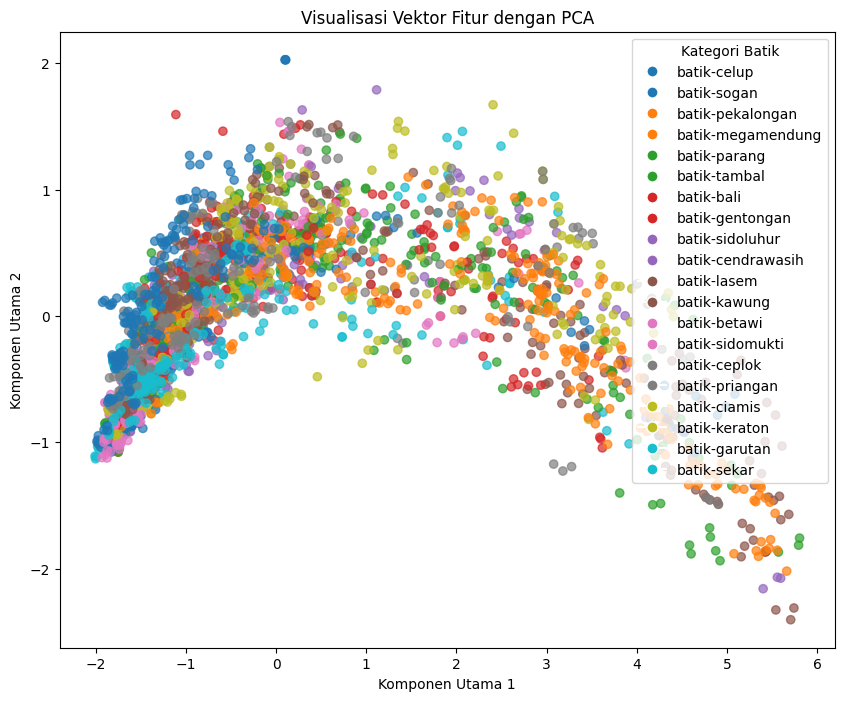

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE  # alternatif jika ingin menggunakan t-SNE

# Misal, 'extracted_features' adalah dictionary dengan struktur:
# {'batik-cendrawasih': [vec1, vec2, ...], 'batik-bali': [vec3, vec4, ...], ...}
# di mana setiap 'vec' adalah array NumPy berdimensi (256,)

# Gabungkan semua vektor fitur dan buat label kategori untuk tiap vektor
all_vectors = []
all_labels = []

for folder, vec_list in extracted_features.items():
    for vec in vec_list:
        all_vectors.append(vec)
        all_labels.append(folder)

all_vectors = np.array(all_vectors)  # bentuk (n_samples, 256)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_vectors)

# Plot hasil PCA
plt.figure(figsize=(10, 8))
unique_labels = list(set(all_labels))
# Buat mapping label ke angka agar bisa diberi warna
label_to_color = {label: i for i, label in enumerate(unique_labels)}
colors = [label_to_color[label] for label in all_labels]

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, cmap="tab10", alpha=0.7)
plt.title("Visualisasi Vektor Fitur dengan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
# Tambahkan legenda sederhana
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.tab10(label_to_color[label] / len(unique_labels)), markersize=8)
           for label in unique_labels]
plt.legend(handles=handles, title="Kategori Batik")
plt.show()

# Jika ingin mencoba t-SNE, uncomment baris di bawah ini:
# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(all_vectors)
# plt.figure(figsize=(10,8))
# scatter = plt.scatter(tsne_result[:,0], tsne_result[:,1], c=colors, cmap="tab10", alpha=0.7)
# plt.title("Visualisasi Vektor Fitur dengan t-SNE")
# plt.xlabel("Dimensi 1")
# plt.ylabel("Dimensi 2")
# plt.legend(handles=handles, title="Kategori Batik")
# plt.show()


Jumlah gambar batik pekalongan: 150


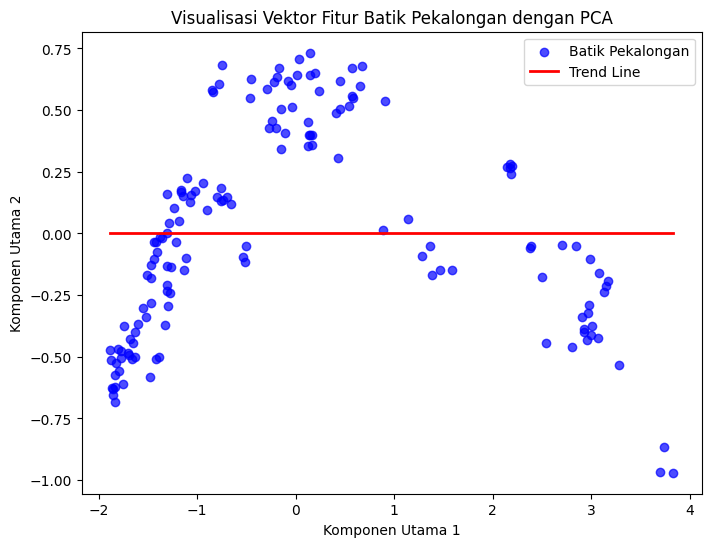

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Pastikan dictionary 'extracted_features' sudah ada dan memiliki key "batik-pekalongan"
if "batik-pekalongan" in extracted_features:
    # Ambil semua vektor fitur untuk batik pekalongan
    pekalongan_vectors = np.array(extracted_features["batik-pekalongan"])
    print("Jumlah gambar batik pekalongan:", pekalongan_vectors.shape[0])
    
    # Reduksi dimensi ke 2 menggunakan PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(pekalongan_vectors)
    
    # Ambil komponen PCA
    x = pca_result[:, 0]
    y = pca_result[:, 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', label='Batik Pekalongan', alpha=0.7)
    
    # Hitung garis regresi linear (trend line)
    slope, intercept = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, color='red', linewidth=2, label='Trend Line')
    
    plt.title("Visualisasi Vektor Fitur Batik Pekalongan dengan PCA")
    plt.xlabel("Komponen Utama 1")
    plt.ylabel("Komponen Utama 2")
    plt.legend()
    plt.show()
else:
    print("Kategori 'batik-pekalongan' tidak ditemukan dalam extracted_features.")


In [28]:
import numpy as np

# Asumsikan 'extracted_features' adalah dictionary dengan struktur:
# { 'batik-cendrawasih': [vec1, vec2, ..., vec150],
#   'batik-bali': [vec1, vec2, ..., vec150],
#   ... }
# di mana setiap 'vec' adalah array NumPy berdimensi (256,)

aggregated_features = {}

for category, embedding_list in extracted_features.items():
    # Gabungkan list embedding menjadi array dengan shape (n_gambar, 256)
    embeddings_array = np.stack(embedding_list, axis=0)
    # Lakukan average pooling (rata-rata) sepanjang axis gambar
    aggregated_vector = np.mean(embeddings_array, axis=0)
    aggregated_features[category] = aggregated_vector

# Contoh: Tampilkan vektor agregat dan dimensinya untuk kategori 'batik-cendrawasih'
if "batik-cendrawasih" in aggregated_features:
    print("Aggregated vector for batik-cendrawasih:")
    print(aggregated_features["batik-cendrawasih"])
    print("Shape:", aggregated_features["batik-cendrawasih"].shape)
else:
    print("Kategori 'batik-cendrawasih' tidak ditemukan dalam extracted_features.")


Aggregated vector for batik-cendrawasih:
[0.00000000e+00 0.00000000e+00 2.44520932e-01 4.44525992e-03
 4.64526983e-03 1.86691439e+00 2.61365831e-01 0.00000000e+00
 1.02694881e+00 0.00000000e+00 0.00000000e+00 1.45980883e+00
 0.00000000e+00 0.00000000e+00 4.25382107e-01 3.03193510e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.03552842e+00 8.81617725e-01 6.67435974e-02 0.00000000e+00
 1.66375644e-03 3.40696156e-01 6.12631381e-01 1.07720840e+00
 0.00000000e+00 2.81128287e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.89313931e-03 4.28667217e-01
 2.15341926e-01 1.29133046e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.06929940e-01 1.31410003e+00 7.52591968e-01
 7.13208497e-01 0.00000000e+00 4.86051768e-01 4.88958150e-01
 1.35082453e-01 8.72867286e-01 0.00000000e+00 2.99517382e-02
 0.00000000e+00 6.42331421e-01 0.00000000e+00 3.89627934e-01
 0.00000000e+00 4.45136875e-01 1.55863750e+00 2.32185051e-01
 0.00000000e+00 7.38041520e-01 3.04708272e-0

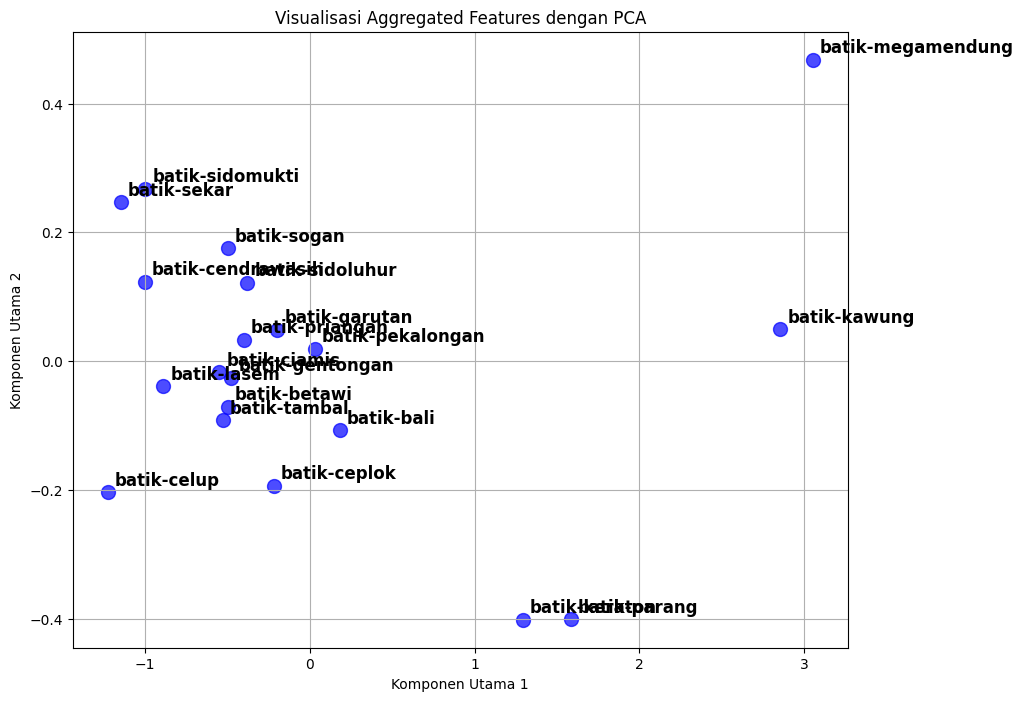

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Asumsikan 'aggregated_features' adalah dictionary yang telah dibuat sebelumnya,
# dengan key = kategori batik dan value = vektor fitur agregat berdimensi (256,)

# Buat list kategori dan array vektor fitur
categories = list(aggregated_features.keys())
aggregated_vectors = np.stack([aggregated_features[cat] for cat in categories], axis=0)

# Reduksi dimensi ke 2 menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(aggregated_vectors)

# Visualisasi dengan scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=100, c='blue', alpha=0.7)

# Tambahkan label kategori pada tiap titik
for i, category in enumerate(categories):
    plt.annotate(category, (pca_result[i, 0], pca_result[i, 1]), fontsize=12, fontweight='bold',
                 xytext=(5, 5), textcoords='offset points')

plt.title("Visualisasi Aggregated Features dengan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.grid(True)
plt.show()


In [30]:
import json

# Misalnya, 'aggregated_features' adalah dictionary dengan struktur:
# {'batik-cendrawasih': aggregated_vector1, 'batik-bali': aggregated_vector2, ...}
# di mana setiap aggregated_vector adalah array NumPy dengan shape (256,)

# Konversi setiap vektor fitur menjadi list
aggregated_features_serializable = {
    category: vector.tolist() for category, vector in aggregated_features.items()
}

# Simpan dictionary ke file JSON
with open('aggregated_features.json', 'w') as f:
    json.dump(aggregated_features_serializable, f)

print("Aggregated features telah disimpan ke file 'aggregated_features.json'.")


Aggregated features telah disimpan ke file 'aggregated_features.json'.


IndexError: list index out of range

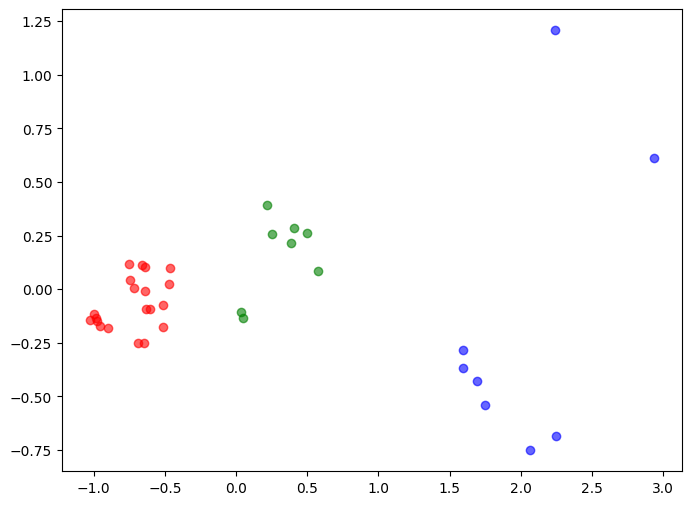

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Asumsikan extracted_features adalah dictionary dengan key "batik-cendrawasih"
# dan value berupa list embedding (setiap embedding berdimensi 256)
if "batik-cendrawasih" in extracted_features:
    # Ambil embedding untuk kategori batik-cendrawasih
    embeddings = np.stack(extracted_features["batik-cendrawasih"], axis=0)  # shape (150, 256)
    
    # Tentukan jumlah cluster (misalnya, 3 cluster)
    k = 3
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Agregasi per cluster (average pooling)
    aggregated_clusters = {}
    for cluster in range(k):
        cluster_embeddings = embeddings[cluster_labels == cluster]
        aggregated_vector = np.mean(cluster_embeddings, axis=0)
        aggregated_clusters[cluster] = aggregated_vector

    # Reduksi dimensi untuk visualisasi menggunakan PCA (2 komponen)
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Transform aggregated cluster vectors ke 2D (menggunakan PCA yang sama)
    agg_vectors = np.stack(list(aggregated_clusters.values()), axis=0)
    aggregated_clusters_2d = pca.transform(agg_vectors)
    
    # Visualisasi hasil clustering
    plt.figure(figsize=(8, 6))
    colors = ['red', 'green', 'blue']  # Atur warna sesuai jumlah cluster
    for cluster in range(k):
        indices = np.where(cluster_labels == cluster)[0]
        plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1],
                    color=colors[cluster], alpha=0.6, label=f"Cluster {cluster}")
    
    # Plot aggregated cluster centers sebagai tanda X hitam
    plt.scatter(aggregated_clusters_2d[:, 0], aggregated_clusters_2d[:, 1],
                color='black', marker='X', s=200, label='Aggregated Cluster Centers')
    
    plt.title("Clustering dan Aggregated Cluster Centers untuk Batik Cendrawasih")
    plt.xlabel("Komponen PCA 1")
    plt.ylabel("Komponen PCA 2")
    plt.legend()
    plt.show()
else:
    print("Kategori 'batik-cendrawasih' tidak ditemukan dalam extracted_features.")
